<a href="https://colab.research.google.com/github/SK-Faizan-Nasir/Indian-Crop-Production-Prediction/blob/main/cropproductionfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"skfaizannasir","key":"0851e08dbcd1b0736b269ddf7edf01ff"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d abhinand05/crop-production-in-india

crop-production-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/crop-production-in-india.zip

Archive:  /content/crop-production-in-india.zip
replace crop_production.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: crop_production.csv     


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
#importing necessary libraries

In [ ]:
df=pd.read_csv("crop_production.csv")
#loading data

In [ ]:
df #showing the dataframe

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
df.head() #first five rows

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.tail() #last five rows

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [ ]:
len(df) #total rows in the df

246091

In [ ]:
df.isnull().sum() #check if any column is having missing data


State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

As we can see production is having 3730 null values

Removing the nan values since it is in your dependent variable

In [ ]:
df[df['Production'].isna()] #fetching the rows where production is missing

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [ ]:
df=df.loc[~df['Production'].isna()] #storing rows only where production is not missing

In [ ]:
len(df) #new no of nows after removing 3730 values

242361

In [ ]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
df.isnull().sum()
#checking the missing data now

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
for i in df.columns:
    print("column name :",i)
    print("No. of unique elements :",len(df[i].unique()))
    print(df[i].unique())

#checking the unique value and their no in the dataset

column name : State_Name
No. of unique elements : 33
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
column name : District_Name
No. of unique elements : 646
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST K

In [ ]:
sum_maxp = df["Production"].sum()
df["percent_of_production"] = df["Production"].map(lambda x:(x/sum_maxp)*100)
#adding a new percentage column with the percentage of the production

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,5.673764e-07
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,3.279592e-07
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,1.151045e-05
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,4.235129e-04


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

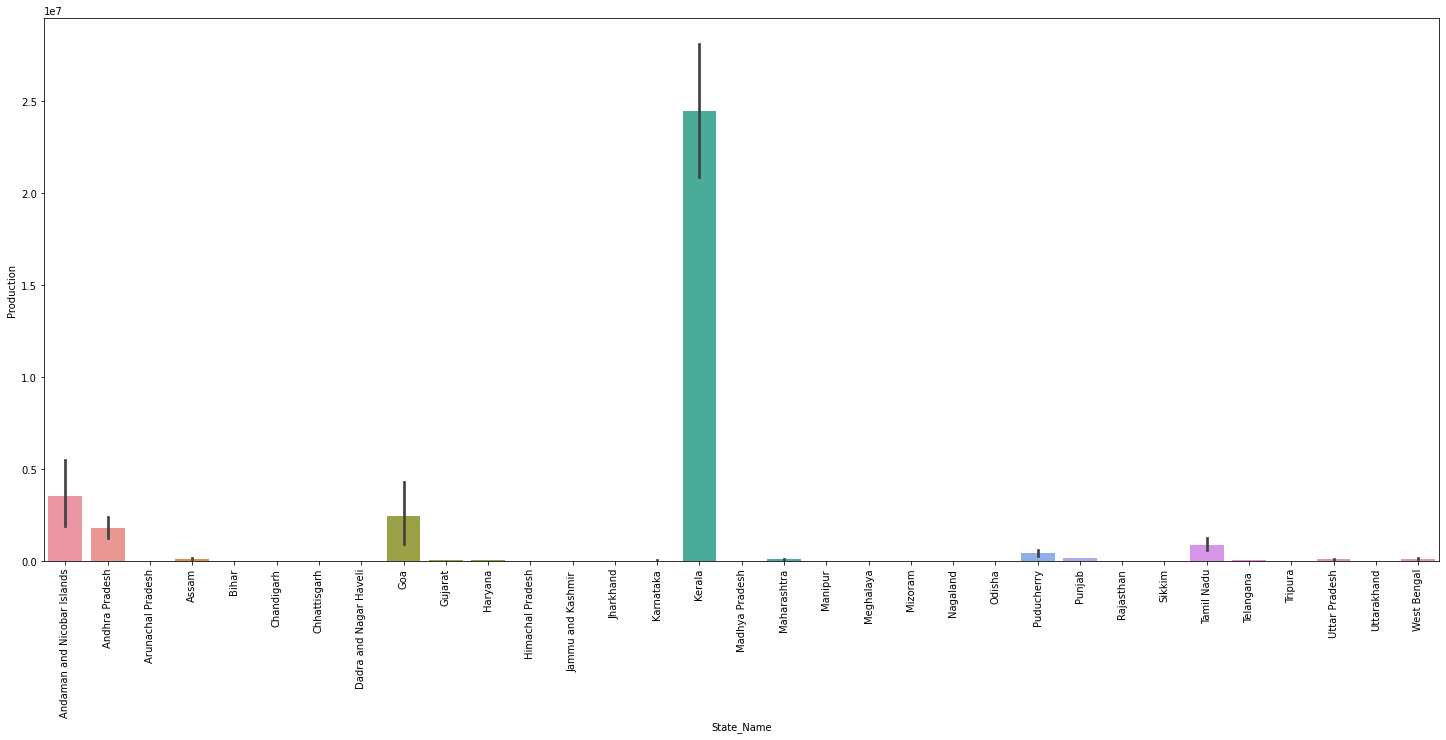

In [ ]:
#Statewise Production
plt.figure(figsize=(25,10))
sns.barplot(df["State_Name"],df["Production"])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


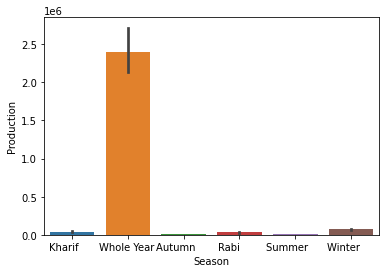

In [ ]:
sns.barplot(df["Season"],df["Production"])
#seasonwise production

In [ ]:
df.describe(include='all')
#descriptive statistics on the data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
count,242361,242361,242361.000000,242361,242361,2.423610e+05,2.423610e+05,2.423610e+05
unique,33,646,NaN,6,124,NaN,NaN,NaN
top,Uttar Pradesh,TUMKUR,NaN,Kharif,Rice,NaN,NaN,NaN
freq,33189,931,NaN,94283,15082,NaN,NaN,NaN
mean,NaN,NaN,2005.625773,NaN,NaN,1.216741e+04,5.825034e+05,4.126076e-04
std,NaN,NaN,4.958285,NaN,NaN,5.085744e+04,1.706581e+07,1.208831e-02
min,NaN,NaN,1997.000000,NaN,NaN,1.000000e-01,0.000000e+00,0.000000e+00
25%,NaN,NaN,2002.000000,NaN,NaN,8.700000e+01,8.800000e+01,6.233349e-08
50%,NaN,NaN,2006.000000,NaN,NaN,6.030000e+02,7.290000e+02,5.163763e-07
75%,NaN,NaN,2010.000000,NaN,NaN,4.545000e+03,7.023000e+03,4.974637e-06


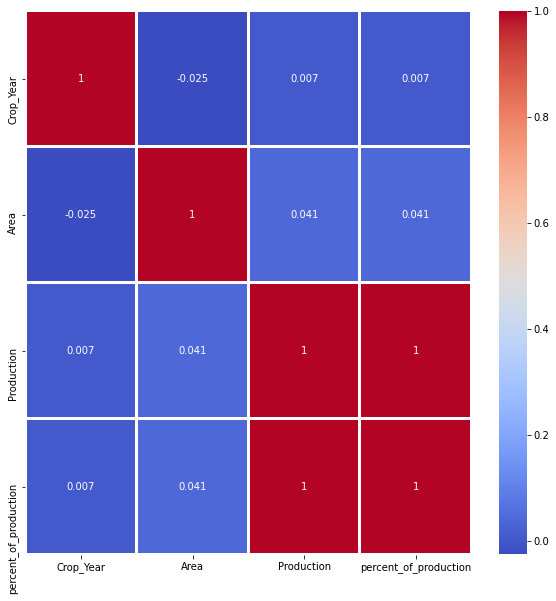

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=2,cmap='coolwarm')
# correlation check

As our new column is highly corelated with our dependent variable our model will do a good job

In [ ]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,5.673764e-07
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,3.279592e-07
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,1.151045e-05
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,4.235129e-04


In [ ]:
df2=pd.get_dummies(df.drop(['District_Name','Crop_Year'],axis=1)) 
#Dropping district names and the crop year since they are not very informative features
#Encoding into df2 for all other categorical data

In [ ]:
df2

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,...,Crop_Plums,Crop_Pome Fruit,Crop_Pome Granet,Crop_Potato,Crop_Pulses total,Crop_Pump Kin,Crop_Ragi,Crop_Rajmash Kholar,Crop_Rapeseed &Mustard,Crop_Redish,Crop_Ribed Guard,Crop_Rice,Crop_Ricebean (nagadal),Crop_Rubber,Crop_Safflower,Crop_Samai,Crop_Sannhamp,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Snak Guard,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tea,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1.416670e-06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,7.083351e-10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,2.273756e-07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,4.540428e-07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1.168753e-07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,306.0,801.0,5.673764e-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246087,627.0,463.0,3.279592e-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246088,324.0,16250.0,1.151045e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246089,279151.0,597899.0,4.235129e-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y=df2['Production'] #Dependent variable

In [ ]:
Y

0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 242361, dtype: float64

In [ ]:
X=df2.drop('Production',axis=1) #all independent variables

In [ ]:
X

,Area,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,...,Crop_Plums,Crop_Pome Fruit,Crop_Pome Granet,Crop_Potato,Crop_Pulses total,Crop_Pump Kin,Crop_Ragi,Crop_Rajmash Kholar,Crop_Rapeseed &Mustard,Crop_Redish,Crop_Ribed Guard,Crop_Rice,Crop_Ricebean (nagadal),Crop_Rubber,Crop_Safflower,Crop_Samai,Crop_Sannhamp,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Snak Guard,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tea,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,1.416670e-06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,7.083351e-10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,102.0,2.273756e-07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,176.0,4.540428e-07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,720.0,1.168753e-07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,306.0,5.673764e-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246087,627.0,3.279592e-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246088,324.0,1.151045e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246089,279151.0,4.235129e-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=0) 
#split data into train and test set 75:25 train test ratio

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = model.predict(x_test)

In [ ]:
r2_score(y_test,preds)

1.0

In [ ]:
c=cross_val_score(model,X,Y,cv=5)
c.mean()

1.0

In [ ]:
c

array([1., 1., 1., 1., 1.])

RF Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg=RandomForestRegressor().fit(x_train,y_train)
pred=reg.predict(x_test)
print("R2: ",r2_score(y_test,pred))

R2:  0.9995159272970907


The above method gives the best so let's try without adding a new feature that is directly related to the outcome

In [ ]:
data=pd.read_csv("crop_production.csv") #load data

In [ ]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
data.isnull().sum() #check null

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
data[data['Production'].isna()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [ ]:
data=data[~data['Production'].isna()] #remove null columns

In [ ]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
data.drop(['District_Name','Crop_Year'],axis=1,inplace=True) #dropping uninformative features

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data

,State_Name,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...
246086,West Bengal,Summer,Rice,306.0,801.0
246087,West Bengal,Summer,Sesamum,627.0,463.0
246088,West Bengal,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,Winter,Rice,279151.0,597899.0


In [ ]:
tem=pd.get_dummies(data) #encoding categorical

In [ ]:
tem

,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,...,Crop_Plums,Crop_Pome Fruit,Crop_Pome Granet,Crop_Potato,Crop_Pulses total,Crop_Pump Kin,Crop_Ragi,Crop_Rajmash Kholar,Crop_Rapeseed &Mustard,Crop_Redish,Crop_Ribed Guard,Crop_Rice,Crop_Ricebean (nagadal),Crop_Rubber,Crop_Safflower,Crop_Samai,Crop_Sannhamp,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Snak Guard,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tea,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,306.0,801.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246087,627.0,463.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246088,324.0,16250.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246089,279151.0,597899.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tem.shape

(242361, 165)

In [ ]:
X1=tem.drop('Production',axis=1)
Y1=tem['Production']

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,Y1,test_size=0.25, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred=model.predict(x_test1)

In [ ]:
r2_score(y_test1,pred)

0.1313644111211627

Without the use of feature engineering and feature selection the same model performs so poorly from 100% to 13% dip

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg2=DecisionTreeRegressor(criterion='mse')

In [ ]:
reg2.fit(x_train1,y_train1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
pred=reg2.predict(x_test1)
r2_score(y_test1,pred)

0.7330919090330832

However decision trees are working fine at 73%

Your task is to try out a few different regression models without adding the percentage feature and see what's the maximum r squared you can find.<br>
Remember: Your training might take 5-30 mins depending on your system performance since, this is a large dataset. 